# WRFChem

WRFChem is numerical weather prediction model coupled with chemistry.

For more information on running WRFChem, see [WRFotron](https://wrfchem-leeds.github.io/WRFotron).

## Simple plot

In [1]:
import salem
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

In [2]:
ds = salem.open_wrf_dataset(salem.utils.get_demo_file('wrfout_d01.nc'))
ds

<xarray.Dataset>
Dimensions:       (bottom_top: 27, south_north: 150, time: 3, west_east: 150)
Coordinates:
    lon           (south_north, west_east) float32 70.723145 ... 117.81842
    lat           (south_north, west_east) float32 7.78907 ... 46.457573
  * time          (time) datetime64[ns] 2008-10-26T12:00:00 ... 2008-10-26T18...
  * west_east     (west_east) float64 -2.235e+06 -2.205e+06 ... 2.235e+06
  * south_north   (south_north) float64 -2.235e+06 -2.205e+06 ... 2.235e+06
Dimensions without coordinates: bottom_top
Data variables:
    T2            (time, south_north, west_east) float32 ...
    RAINC         (time, south_north, west_east) float32 ...
    RAINNC        (time, south_north, west_east) float32 ...
    U             (time, bottom_top, south_north, west_east) float32 ...
    V             (time, bottom_top, south_north, west_east) float32 ...
    PH            (time, bottom_top, south_north, west_east) float32 ...
    PHB           (time, bottom_top, south_north, west_east) float32 ...
    T2C           (time, south_north, west_east) float32 ...
    PRCP          (time, south_north, west_east) float32 ...
    WS            (time, bottom_top, south_north, west_east) float32 ...
    GEOPOTENTIAL  (time, bottom_top, south_north, west_east) float32 ...
    Z             (time, bottom_top, south_north, west_east) float32 ...
    PRCP_NC       (time, south_north, west_east) float32 ...
    PRCP_C        (time, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V3.1.1 MODEL
    START_DATE:                      2008-10-26_12:00:00
    SIMULATION_START_DATE:           2008-10-26_12:00:00
    WEST-EAST_GRID_DIMENSION:        151
    SOUTH-NORTH_GRID_DIMENSION:      151
    BOTTOM-TOP_GRID_DIMENSION:       28
    DX:                              30000.0
    DY:                              30000.0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.01
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      8
    RA_LW_PHYSICS:                   1
    RA_SW_PHYSICS:                   1
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  2
    CU_PHYSICS:                      1
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    SF_URBAN_PHYSICS:                0
    FEEDBACK:                        1
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       1
    MOIST_ADV_OPT:                   1
    SCALAR_ADV_OPT:                  1
    TKE_ADV_OPT:                     1
    DIFF_6TH_OPT:                    0
    DIFF_6TH_FACTOR:                 0.12
    OBS_NUDGE_OPT:                   0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      150
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        151
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    150
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      151
    BOTTOM-TOP_PATCH_START_UNSTAG:   1
    BOTTOM-TOP_PATCH_END_UNSTAG:     27
    BOTTOM-TOP_PATCH_START_STAG:     1
    BOTTOM-TOP_PATCH_END_STAG:       28
    GRID_ID:                         1
    PARENT_ID:                       1
    I_PARENT_START:                  1
    J_PARENT_START:                  1
    PARENT_GRID_RATIO:               1
    DT:                              120.0
    CEN_LAT:                         29.039997
    CEN_LON:                         89.79999
   

In [3]:
temp_mean = ds['T2'].mean(dim='time')
temp_mean

<xarray.DataArray 'T2' (south_north: 150, west_east: 150)>
array([[301.9375 , 301.95572, 302.00522, ..., 301.41406, 301.33853,
        301.3047 ],
       [301.9349 , 302.     , 302.04688, ..., 301.47134, 301.39844,
        301.36197],
       [301.9349 , 302.0026 , 302.04166, ..., 301.50522, 301.45572,
        301.4297 ],
       ...,
       [279.84634, 279.70053, 279.58594, ..., 267.8047 , 268.3151 ,
        268.58072],
       [279.70312, 279.20312, 279.33853, ..., 268.08072, 268.3203 ,
        268.6224 ],
       [279.6354 , 279.14062, 278.6901 , ..., 268.61978, 268.70572,
        268.8099 ]], dtype=float32)
Coordinates:
    lon          (south_north, west_east) float32 70.723145 ... 117.81842
    lat          (south_north, west_east) float32 7.78907 ... 46.457573
  * west_east    (west_east) float64 -2.235e+06 -2.205e+06 ... 2.235e+06
  * south_north  (south_north) float64 -2.235e+06 -2.205e+06 ... 2.235e+06

In [4]:
lon = ds.lon.values
lat = ds.lat.values

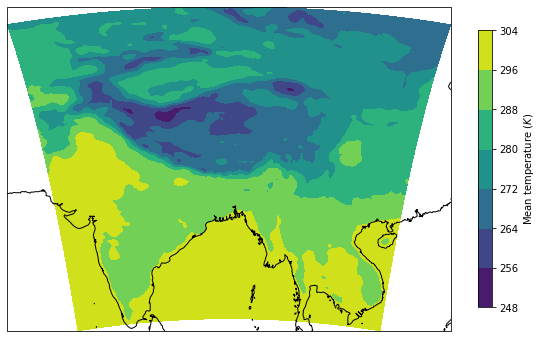

In [5]:
fig = plt.figure(1, figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax.coastlines()
im = ax.contourf(lon, lat, temp_mean, transform=ccrs.PlateCarree())
fig.colorbar(im, label='Mean temperature ($K$)', shrink=0.5)

plt.tight_layout()
plt.show()

## Problem: Crop arrays to shapefiles

### Solution 1
- Customisable cropping
- Destaggered/rectilinear grid e.g. after using `pp_concat_regrid.py` on WRFChem output with Salem to destagger and XEMSF to regrid to rectilinear grid
  - For conservative regridding, consider [xgcm](https://xgcm.readthedocs.io/en/latest/).  

In [ ]:
import numpy as np
import xarray as xr
import geopandas as gpd
from rasterio import features
from affine import Affine

In [ ]:
def transform_from_latlon(lat, lon):
    """ input 1D array of lat / lon and output an Affine transformation """
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale


def rasterize(shapes, coords, latitude='latitude', longitude='longitude', fill=np.nan, **kwargs):
    """
    Description:    
        Rasterize a list of (geometry, fill_value) tuples onto the given
        xarray coordinates. This only works for 1D latitude and longitude
        arrays.
    Usage:
        1. read shapefile to geopandas.GeoDataFrame
               `states = gpd.read_file(shp_dir+shp_file)`
        2. encode the different shapefiles that capture those lat-lons as different
           numbers i.e. 0.0, 1.0 ... and otherwise np.nan
              `shapes = (zip(states.geometry, range(len(states))))`
        3. Assign this to a new coord in your original xarray.DataArray
              `ds['states'] = rasterize(shapes, ds.coords, longitude='X', latitude='Y')`
    Arguments:
        **kwargs (dict): passed to `rasterio.rasterize` function.
    Attributes:
        transform (affine.Affine): how to translate from latlon to ...?
        raster (numpy.ndarray): use rasterio.features.rasterize fill the values
                                outside the .shp file with np.nan
        spatial_coords (dict): dictionary of {"X":xr.DataArray, "Y":xr.DataArray()}
                               with "X", "Y" as keys, and xr.DataArray as values
    Returns:
        (xr.DataArray): DataArray with `values` of nan for points outside shapefile
                        and coords `Y` = latitude, 'X' = longitude.
    """
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(
        shapes, 
        out_shape=out_shape,
        fill=fill,
        transform=transform,
        dtype=float, 
        **kwargs
    )
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

In [17]:
# single multipolygon
shapefile = gpd.read_file('/nfs/a68/earlacoa/shapefiles/china/CHN_adm0.shp')
shapes = [(shape, index) for index, shape in enumerate(shapefile.geometry)]

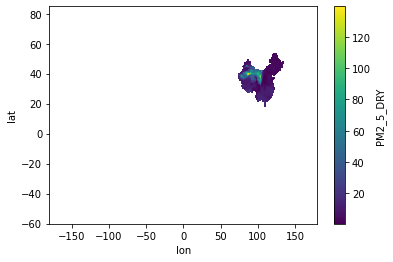

In [18]:
# using regridded file (xemsf)
ds = xr.open_dataset(
    '/nfs/b0122/Users/earlacoa/shared/nadia/wrfout_d01_global_0.25deg_2015-06_PM2_5_DRY_nadia.nc'
)['PM2_5_DRY'].mean(dim='time')

# apply shapefile to geometry, default: inside shapefile == 0, outside shapefile == np.nan
ds['shapefile'] = rasterize(shapes, ds.coords, longitude='lon', latitude='lat') 

# change to more intuitive labelling of 1 for inside shapefile and np.nan for outside shapefile
# if condition preserve (outside shapefile, as inside defaults to 0), otherwise (1, to mark in shapefile)
ds['shapefile'] = ds.shapefile.where(cond=ds.shapefile!=0, other=1) 

# example: crop to shapefile
# if condition (inside shapefile) preserve, otherwise (outside shapefile) remove
ds = ds.where(cond=ds.shapefile==1, other=np.nan) # could scale instead with other=ds*scale

ds.plot()

### Solution 2
- Cropping only
- Destaggered/rectilinear grid e.g. after using `pp_concat_regrid.py` on WRFChem output with Salem to destagger and XEMSF to regrid to rectilinear grid
  - For conservative regridding, consider [xgcm](https://xgcm.readthedocs.io/en/latest/).  

In [ ]:
import xarray as xr
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping

In [19]:
shapefile = gpd.read_file('/nfs/a68/earlacoa/shapefiles/china/CHN_adm0.shp', crs="epsg:4326")

In [20]:
ds = xr.open_dataset(
    '/nfs/b0122/Users/earlacoa/shared/nadia/wrfout_d01_global_0.25deg_2015-06_PM2_5_DRY_nadia.nc'
)['PM2_5_DRY'].mean(dim='time')

In [21]:
ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ds.rio.write_crs("epsg:4326", inplace=True)
ds_clipped = ds.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=False)

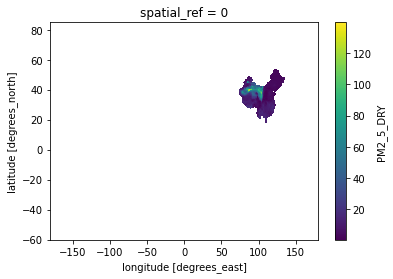

In [22]:
ds_clipped.plot()

### Solution 3
- Staggered grid
  - [WRFChem projection](https://fabienmaussion.info/2018/01/06/wrf-projection/) is normally on a [Arakawa-C Grid](https://xgcm.readthedocs.io/en/latest/grids.html)
  - e.g. intermediate WRFChem files that need to be reused (wrfiobiochemi)
  - e.g. raw wrfout file (after postprocessing) still on Arakawa-C Grid (2D lat/lon coordinates)

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd # ensure version > 0.8.0

In [ ]:
# WARNING: the double for loop of geometry creation and checking is very slow
# the mask in the cell below has already been calculated
ds = xr.open_dataset('/nfs/b0122/Users/earlacoa/shared/nadia/wrfbiochemi')['MSEBIO_ISOP']
shapefile = gpd.read_file('/nfs/a68/earlacoa/shapefiles/china/CHN_adm0.shp')
mask = np.empty([ds.south_north.shape[0], ds.west_east.shape[0]])
mask[:] = np.nan

for index_lat in range(ds.south_north.shape[0]):
    for index_lon in range(ds.west_east.shape[0]):
        lat = ds.isel(south_north=index_lat).isel(west_east=index_lon).XLAT.values[0]
        lon = ds.isel(south_north=index_lat).isel(west_east=index_lon).XLONG.values[0]

        point_df = pd.DataFrame({'longitude': [lon], 'latitude': [lat]})
        point_geometry = gpd.points_from_xy(point_df.longitude, point_df.latitude, crs="EPSG:4326")
        point_gdf = gpd.GeoDataFrame(point_df, geometry=point_geometry)

        point_within_shapefile = point_gdf.within(shapefile)[0]
        
        if point_within_shapefile:
            mask[index_lat][index_lon] = True

In [26]:
# bring in mask which computed earlier
ds = xr.open_dataset('/nfs/b0122/Users/earlacoa/shared/nadia/wrfbiochemi')
mask = np.load('/nfs/b0122/Users/earlacoa/shared/nadia/mask_china.npz')['mask']

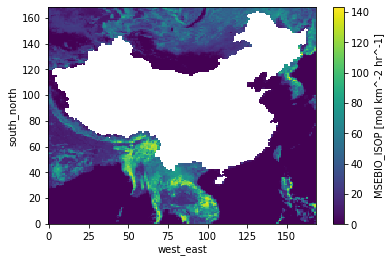

In [27]:
# demo - removing values in mask
demo = ds['MSEBIO_ISOP'].where(cond=mask!=True, other=np.nan)
demo.plot()

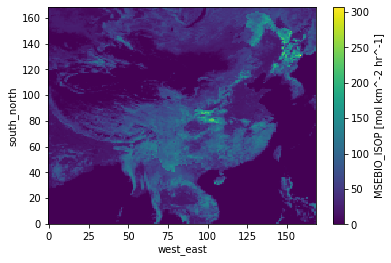

In [28]:
# example - doubling isoprene emissions within mask
ds['MSEBIO_ISOP'] = ds['MSEBIO_ISOP'].where(cond=mask!=True, other=2*ds['MSEBIO_ISOP'])
ds['MSEBIO_ISOP'].plot()

In [29]:
# saving back into dataset
ds.to_netcdf('/nfs/b0122/Users/earlacoa/shared/nadia/wrfbiochemi_double_isoprene_china')

In [30]:
# check that doubling persisted
ds_original = xr.open_dataset('/nfs/b0122/Users/earlacoa/shared/nadia/wrfbiochemi')['MSEBIO_ISOP']
ds_double = xr.open_dataset('/nfs/b0122/Users/earlacoa/shared/nadia/wrfbiochemi_double_isoprene_china')['MSEBIO_ISOP']

In [33]:
fraction = ds_double / ds_original

In [35]:
print(fraction.max().values)
print(fraction.min().values)
print(fraction.mean().values)

2.0
1.0
1.4608158
